## Introduction:
This notebook is to preliminary analysis using PV data provided and combing it with weather data downloaded from meteostat.

In [3]:
import pandas as pd

In [4]:
df_weather = pd.read_csv('../data/weather_data_london.csv', sep=',', header='infer')
df_weather = df_weather.rename(columns={'time':'datetime'})
df_pvc = pd.read_csv('../data/pvc_sensors.csv', sep=',', header='infer')
df_pvc = df_pvc.rename(columns={'Date (UTC)':'datetime', '1200061435370 (kWh)': 'PV Panel A', '1200061695248 (kWh)':'PV Panel B'})

In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_pvc, title="Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#converting time column to datetime and making time as index column
df_pvc['datetime'] = pd.to_datetime(df_pvc['datetime'], format = '%d/%m/%Y %H:%M')
df_weather['datetime'] =pd.to_datetime(df_weather['datetime'], format = '%Y-%m-%d %H:%M:%S')

In [7]:
df_pvc['date'] = df_pvc['datetime'].dt.date
df_pvc['time'] = df_pvc['datetime'].dt.time

In [8]:
df_weather['date'] = df_weather['datetime'].dt.date
df_weather['time'] = df_weather['datetime'].dt.time

In [9]:
df_pvc = df_pvc.set_index('datetime')
df_weather = df_weather.set_index('datetime')

In [10]:
# Find the first and last dates in the index of the DataFrame
first_date = df_pvc.index.min()
last_date = df_pvc.index.max()
# Print the results
print("The first date in the time series is {}.".format(first_date))
print("The last date in the time series is {}.".format(last_date))

The first date in the time series is 2022-02-21 00:00:00.
The last date in the time series is 2023-02-19 23:30:00.


In [11]:
#aggregate to hourly
df_pvc_hourly = df_pvc.resample('H').mean()

In [12]:
df_merged = pd.merge(df_pvc_hourly, df_weather, on ='datetime')

In [13]:
display(df_merged)

,PV Panel A,PV Panel B,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,date,time
datetime,,,,,,,,,,,,,,,
2022-02-21 00:00:00,0.0,0.0,4.5,-0.7,69.0,NaN,NaN,267.0,35.2,53.7,1003.0,NaN,2.0,2022-02-21,00:00:00
2022-02-21 01:00:00,0.0,0.0,3.9,-0.9,71.0,NaN,NaN,267.0,35.2,53.7,1003.2,NaN,2.0,2022-02-21,01:00:00
2022-02-21 02:00:00,0.0,0.0,3.7,-1.1,71.0,NaN,NaN,266.0,35.2,55.5,1003.3,NaN,2.0,2022-02-21,02:00:00
2022-02-21 03:00:00,0.0,0.0,3.7,-1.1,71.0,NaN,NaN,264.0,37.0,55.5,1003.3,NaN,2.0,2022-02-21,03:00:00
2022-02-21 04:00:00,0.0,0.0,3.8,-0.6,73.0,NaN,NaN,268.0,35.2,51.8,1003.3,NaN,2.0,2022-02-21,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-19 19:00:00,0.0,0.0,8.2,5.0,80.0,NaN,NaN,244.0,13.0,24.1,1027.1,NaN,2.0,2023-02-19,19:00:00
2023-02-19 20:00:00,0.0,0.0,7.6,4.5,81.0,NaN,NaN,241.0,14.8,25.9,1027.1,NaN,2.0,2023-02-19,20:00:00
2023-02-19 21:00:00,0.0,0.0,7.1,4.6,84.0,NaN,NaN,244.0,16.7,27.8,1027.1,NaN,2.0,2023-02-19,21:00:00


In [15]:
# df_merged.to_csv('../data/merged_weather_data.csv', sep =',', header = True)

In [16]:
# %pip install ydata-profiling

In [17]:
from ydata_profiling import ProfileReport
profile1 = ProfileReport(df_merged, title="Profiling Report")
profile1.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
import matplotlib.pyplot as plt

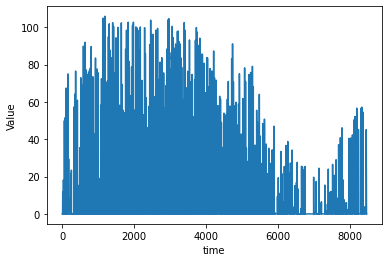

In [19]:
# plot the time series
plt.plot(df_merged['PV Panel A'].values)
plt.xlabel('time')
plt.ylabel('Value')
plt.show()

In [20]:
# 1. remove rows where column has nan values
# 2. take only that riw where sensor has greater than 0 value
# check correlation again.

In [ ]:
df1 = df_merged[df_merged['sensor A'].notna()]

In [ ]:
# df2 = df1[df1['sensor A']>0]

In [ ]:
# df2.to_csv('weather-data/merged_data_filtered.csv', sep =',', header = True)

In [ ]:
# display(df2)

In [ ]:
# profile1 = ProfileReport(df2, title="Profiling Report 2")

In [ ]:
# profile1.to_widgets()